In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli

Uniform Distribution

In [4]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

print(data_uniform)

[15.86907791 27.11214623 29.67747063 ... 24.90219805 16.38062384
 27.35978418]


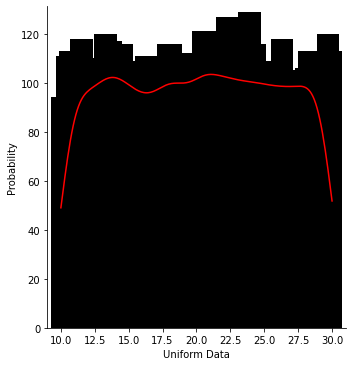

In [16]:
ax = sns.displot(kind='hist',
                 data=data_uniform, 
                 bins=100, 
                 kde=True,
                 color='red',
                 alpha=1,
                 linewidth=20)

plt.xlabel('Uniform Data')
plt.ylabel('Probability')
plt.show()

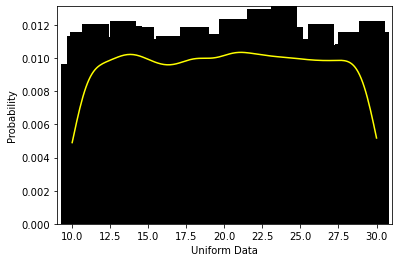

In [23]:
sns.histplot(x=data_uniform, stat='probability', bins=100, kde=True, color="yellow", alpha=0.75, linewidth=23)

plt.xlabel('Uniform Data')
plt.ylabel('Probability')
plt.show()

Normal Distribution

[ 0.70816504 -0.89420883  1.05165646 ...  1.05400918  0.09259194
  0.38343708]


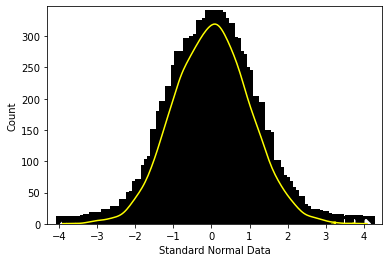

In [29]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000, loc=0, scale=1)
print(data_normal)

sns.histplot(
    x=data_normal, bins=100, kde=True, color="yellow",
    alpha=1, linewidth=15
)

plt.xlabel('Standard Normal Data')
plt.ylabel('Count')
plt.show()

Gamma Distribution

[4.18161943 3.52764514 6.80640903 ... 7.50815762 7.6833838  2.51890303]


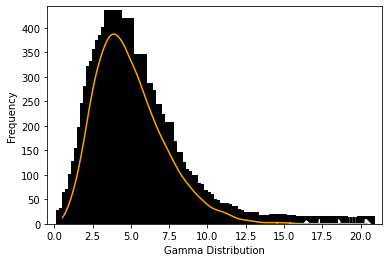

In [31]:
data_gamma = gamma.rvs(a=5, size=10000)
print(data_gamma)

sns.histplot(
    x=data_gamma, bins=100, kde=True, color="orange",
    alpha=1, linewidth=15
)

plt.xlabel('Gamma Distribution')
plt.ylabel('Frequency')
plt.show()

Exponential Distribution

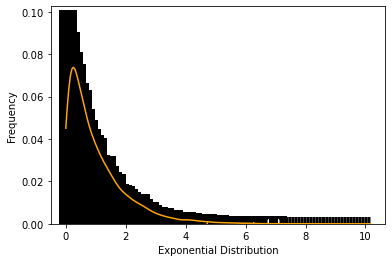

In [37]:
data_expon = expon.rvs(scale=1, loc=0, size=10000)

sns.histplot(
    x=data_expon, stat='probability', bins=100, kde=True, color="orange",
    alpha=1, linewidth=15
)

plt.xlabel('Exponential Distribution')
plt.ylabel('Frequency')
plt.show()

Poisson Distribution

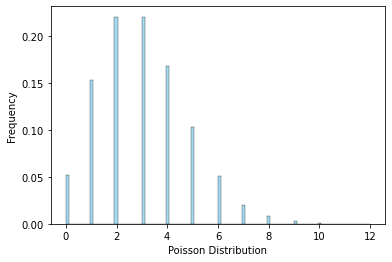

In [46]:
data_poisson = poisson.rvs(mu=3, size=10000)

sns.histplot(
    x=data_poisson, stat='probability', bins=100, color="skyblue",
)

plt.xlabel('Poisson Distribution')
plt.ylabel('Frequency')
plt.show()

Binomial Distribution

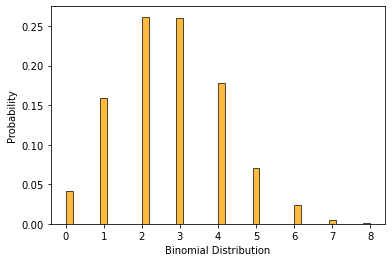

In [55]:
data_binom = binom.rvs(n=10, p=0.27, size=10000)

sns.histplot(
    x=data_binom, stat='probability', color="orange",
)

plt.xlabel('Binomial Distribution')
plt.ylabel('Probability')
plt.show()

[1 1 1 ... 1 0 1]


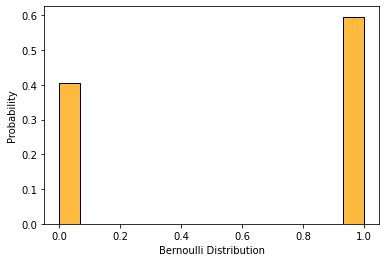

In [60]:
data_bern = bernoulli.rvs(p=0.6, size=10000)
print(data_bern)

sns.histplot(
    x=data_bern, stat='probability', color="orange",
)

plt.xlabel('Bernoulli Distribution')
plt.ylabel('Probability')
plt.show()

Confidence Interval

In [69]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [71]:
df['Sex1'] = df.sex.replace({1:"Male", 0: "Female"})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Female


In [73]:
dx=df[["target", "Sex1"]].dropna()

In [74]:
# identify number of people with heart condition

pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [75]:
#identify the proportion of female with heart condition

p_fm = 226/(86+226)
p_fm

0.7243589743589743

In [76]:
#total number of female

n=86+226
n

312

In [78]:
# standard error

se_female = np.sqrt(p_fm * (1 - p_fm)/n)
se_female

0.02529714756803247

In [80]:
#create Confidence Interval

z_score = 1.96
lcb = p_fm - z_score* se_female #lower limit of CI
ucb = p_fm + z_score* se_female #Upper limit of CI
lcb, ucb

(0.6747765651256307, 0.773941383592318)

In [81]:
# calculation using library statsmodels

import statsmodels.api as sm
sm.stats.proportion_confint(n*p_fm, n)

(0.6747774762140357, 0.773940472503913)

CI of Mean

In [82]:
# to get mean, std deviation , population size from both male and female

df.groupby("Sex1").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [83]:
#assumptions:

mean_fe = 261.45 #mean cholesterol of female
sd = 64.4        #std deviation for female population
n = 312          #number of female
z = 1.96         #z.score from the z table mentioned before

In [84]:
se = sd / np.sqrt(n)

In [86]:
lcb = mean_fe - z_score* se #lower limit of CI
ucb = mean_fe + z_score* se #Upper limit of CI
lcb, ucb

(254.3039731821066, 268.59602681789335)

In [87]:
import random
import warnings

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [89]:
np.random.seed(42)

normal_dist_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_dist_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)

all_mass_values = np.concatenate((normal_dist_us_male_mass_pounds, normal_dist_us_female_mass_pounds), axis=0)

df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


In [90]:
n = 1018
p_null = .52
p_alternate = .56

sm.stats.proportions_ztest(p_alternate * n, n, p_null, alternative='larger')

(2.571067795759113, 0.005069273865860533)